In [257]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd

#leitura dos dados do arquivo excel com as respostas
dados = pd.read_excel('questionario.xlsx')
dados.sample(5)

,data/hora,genero,idade,escolaridade,possui celular/smarphone,SO celular,SO celular influenciou compra,caracteristicas SO celular que influenciaram compra,possui computador/notebook,SO computador,SO computador influenciou compra,caracteristicas SO computador influenciou compra,considera importante conhecer sobre o SO para avaliar a melhor opção,SO influencia preco final
78,2023-03-31 15:27:25.857,Homem cisgênero,Entre 20 e 30 anos,Ensino Superior Incompleto,SIM,Android,SIM,"Facilidade de uso, Segurança/confiabilidade, O...",SIM,Windows,SIM,"Facilidade de uso, Segurança/confiabilidade, O...",SIM,SIM
123,2023-03-31 17:31:11.586,Homem cisgênero,Entre 20 e 30 anos,Ensino Médio Completo,SIM,Android,SIM,"Popularidade, Opções de aplicativos compatíveis",SIM,Windows,SIM,"Popularidade, Opções de aplicativos compatíveis",SIM,Nunca havia considerado essa possibilidade
93,2023-03-31 15:55:26.263,Não binário,Abaixo de 20 anos,Ensino Médio Completo,SIM,iOS,SIM,Facilidade de uso,SIM,Windows,SIM,Facilidade de uso,SIM,Nunca havia considerado essa possibilidade
58,2023-03-31 14:37:58.447,Não binário,Abaixo de 20 anos,Ensino Fundamental Completo,SIM,Android,SIM,"Facilidade de uso, Segurança/confiabilidade, O...",SIM,Windows,SIM,"Popularidade, Facilidade de uso, Característic...",SIM,SIM
13,2023-03-31 13:43:37.956,Homem cisgênero,Abaixo de 20 anos,Ensino Médio Incompleto,SIM,Android,NÃO,NaN,SIM,Windows,NÃO,NaN,SIM,SIM


In [252]:
# Selecionando somente as linhas em que a pessoa respondeu que o SO do computador é o Windows,e inserindo "None" 
# quando a pessoa não respondeu nada. Além disso, está selecionando somente a coluna das características que 
# influenciaram a compra e resetando o index das linhas, já que as que não são index não serão selecionadas
caracteristicas_influenciaram = dados[dados['SO computador']=='Windows']['caracteristicas SO computador influenciou compra'].reset_index(drop=True)
caracteristicas_influenciaram.fillna('None', inplace=True)

#Transforma a coluna em uma lista, transforma todos os valores em string, junta todas as linhas em um só string separando 
# cada linha da lista por ',', aplicando o método split para criar uma só lista em que cada elemento entre vírgulas vira uma linha,
# por fim tira os espaços que podem ter ficado na frente ou atrás das palavras com o strip, rodando um loop for para fazer isso.
# Também transforma em set para fazer a operação no loop for depois
options = (option.strip() for option in ','.join(map(str, caracteristicas_influenciaram.tolist())).split(','))

count_dict = {}

# utiliza um loop for para percorrer todas as opções da coluna e somar as vezes que aparecem na coluna e insere em um dicionario
# do python a opcao e a quantidade de vezes que aparece
for option in options:
    count = (caracteristicas_influenciaram.str.contains(option)).sum()
    count_dict[option] = count
    
# transforma o dicionário em um DataFrame Pandas para trabalhar melhor com ele na
# Matplotlib, além de ordenar os valores pelo número de vezes que aparecem
data = pd.DataFrame.from_dict(count_dict, orient='index', columns=['count'])
data.sort_values(by='count', ascending=True, inplace=True)
data

,count
Suporte,19
None,23
Popularidade,40
Segurança/confiabilidade,47
Características técnicas,47
Opções de aplicativos compatíveis,50
Facilidade de uso,70


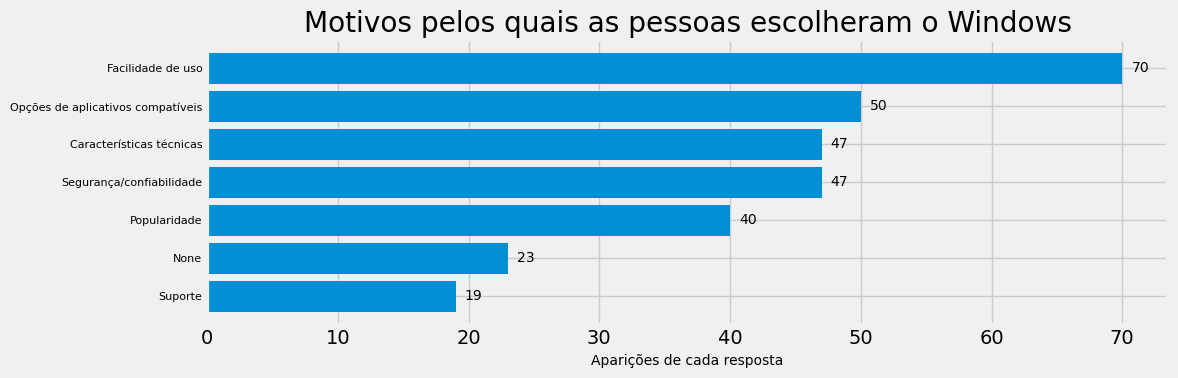

In [4]:
#resetando os parametros do matplotlib para o padrão e adicionando estilo
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('fivethirtyeight')

#criando a figura e os eixos, com tamanho de 12 por 4
fig, ax = plt.subplots(figsize=(12, 4))

#criando o gráfico de barras horizontal, com o y: opções do questionário, acessando o index do dataframe criado
#e o x: a quantidade que cada uma das opções apareceu, acessando a coluna 'count'
ax.barh(data.index, data['count'])

#colocando tamanho da fonte, titulo, label do eixo x e mudando tamanho da fonte das opções do questionario
ax.set_title('Motivos pelos quais as pessoas escolheram o Windows')
ax.set_xlabel('Aparições de cada resposta', fontsize=10)
ax.set_yticks(data.index)
ax.set_yticklabels(data.index, fontsize=8)

#usando um loop for para inserir um texto com o número de respostas 0,7 pixels após o fim do gráfico de barras
for i, v in enumerate(data['count']):
    ax.text(v+.7, i, str(v), color='black', fontsize=10, va='center')

#metodo que posiciona as coisas do melhor jeito na figura
plt.tight_layout()

#mostrar o gráfico
plt.show()

In [250]:
# seleciona apenas as linhas em que a coluna idade é igual a 'Acima de 60 anos' 
# e verifica o tamanho do Dataframes Pandas resultante e imprime no console
print(len(dados[dados['idade']=='Acima de 60 anos']))

# imprime no console o tamanho do DataFrame completo
len(dados)

2


149

In [248]:
# separação dos dados em dois DataFrames, com um contendo as pessoas que responderam windows 
# e o outro as pessoas que responderam qualquer coisa que não fosse windows
idade_windows = dados[dados['SO computador']=='Windows']['idade'].reset_index(drop=True)
idade_naoWindows = dados[dados['SO computador']!='Windows']['idade'].reset_index(drop=True)

# loop for para passar por todos os elementos da Pandas Series e colocar o ponto médio como valor para cada intervalo
# A ideia era usar switch case mas no Python não tem, então foi utilizada uma estrutura com ifs para atruibuir os valores
for i in range(len(idade_windows)):
    if idade_windows[i]=='Abaixo de 20 anos':
        idade_windows[i] = 15
    elif idade_windows[i]=='Entre 20 e 30 anos':
        idade_windows[i] = 25
    elif idade_windows[i]=='Entre 30 e 40 anos':
        idade_windows[i] = 35
    elif idade_windows[i]=='Entre 40 e 50 anos':
        idade_windows[i] = 45
    elif idade_windows[i]=='Entre 50 e 60 anos':
        idade_windows[i] = 55
    elif idade_windows[i]=='Acima de 60 anos':
        idade_windows[i] = 65
        
for i in range(len(idade_naoWindows)):
    if idade_naoWindows[i]=='Abaixo de 20 anos':
        idade_naoWindows[i] = 15
    elif idade_naoWindows[i]=='Entre 20 e 30 anos':
        idade_naoWindows[i] = 25
    elif idade_naoWindows[i]=='Entre 30 e 40 anos':
        idade_naoWindows[i] = 35
    elif idade_naoWindows[i]=='Entre 40 e 50 anos':
        idade_naoWindows[i] = 45
    elif idade_naoWindows[i]=='Entre 50 e 60 anos':
        idade_naoWindows[i] = 55
    elif idade_naoWindows[i]=='Acima de 60 anos':
        idade_naoWindows[i] = 65
    
#calculando as medias e medianas usando os métodos disponíveis no Pandas
mediana_naowindows = idade_naoWindows.median()
media_naowindows = idade_naoWindows.mean()
mediana_windows = idade_windows.median()
media_windows = idade_windows.mean()

#transformando as medianas e medias em um dicionario python para fazer um dataframe no Pandas para visualizar os dados
data = {'Não Windows': [mediana_naowindows, media_naowindows],
        'Windows': [mediana_windows, media_windows]}

#tranformação do dicionário em DataFrame
mediamediana = pd.DataFrame(data, index=['Mediana', 'Média'])

mediamediana

,Não Windows,Windows
Mediana,25.0,15.000000
Média,25.0,21.721311


In [54]:
#Extraindo as medias e medianas em variaveis separadas, para poder extrair o index e valores, tranformá-los em
# uma array do NumPy e poder trabalhar com elas no gráfico de forma mais fácil
medianas = mediamediana.loc['Mediana']
medias = mediamediana.loc['Média']
medianas_val = medianas.to_numpy()
medias_val = medias.to_numpy()
index_medianas = medianas.index.to_numpy()
index_medias = medias.index.to_numpy()

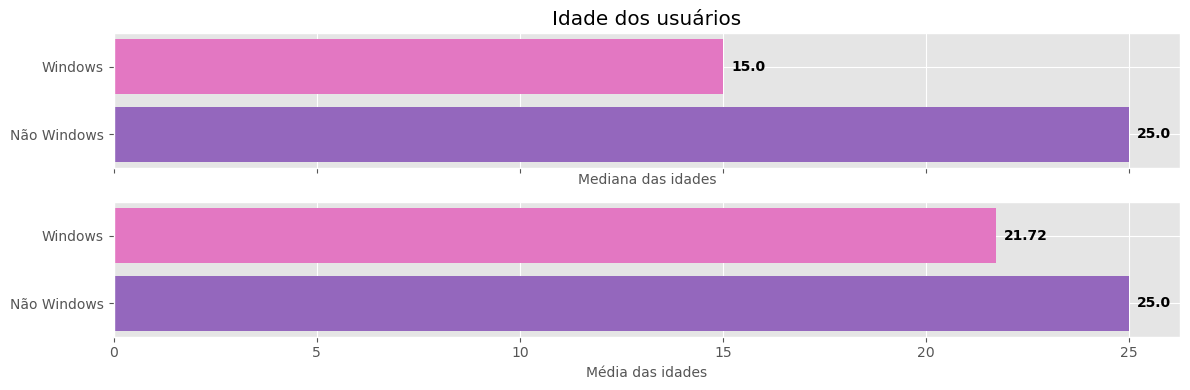

In [55]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ggplot')

#criando a figura com 2 axles, de 2 linhas, com tamanho de 12 por 4, e compartilhando o x
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 4), sharex=True)

#construção dos dois axles do gráfico, com duas barras horizontais em cada, usando as arrays do Numpy 
# e mudando as cores, já que são variáveis diferentes. 
ax1.barh(index_medianas, medianas_val, color=['tab:purple', 'tab:pink'])
ax2.barh(index_medias, medias_val, color=['tab:purple', 'tab:pink'])

#inserindo texto com o valor, com duas casas decimais, de cada barra para uma melhor visualização, 
# colocando 0,2 pixels a frente da barra, centralizada verticalmente no meio da barra 
for i, v in enumerate(medianas_val):
    ax1.text(v + 0.2, i, str(round(v, 2)), color='black', fontweight='bold', fontsize=10, va='center')

for i, v in enumerate(medias_val):
    ax2.text(v + 0.2, i, str(round(v, 2)), color='black', fontweight='bold', fontsize=10, va='center')

#colocando titulo, labels do eixo x
ax1.set_title('Idade dos usuários')
ax1.set_xlabel('Mediana das idades', fontsize=10)
ax2.set_xlabel('Média das idades', fontsize=10)

#metodo que posiciona as coisas do melhor jeito na figura
plt.tight_layout()

#mostrar o gráfico
plt.show()

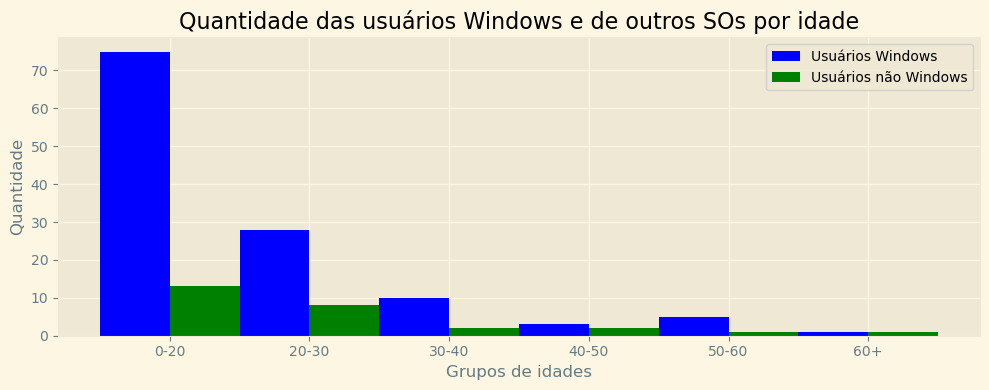

In [61]:
import numpy as np

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('Solarize_Light2')

#os intervalos a serem considerados no histograma do numpy
bins = [0, 20, 30, 40, 50, 60, 70]
bin_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

#criando um objeto em numpy para conseguir fazer o histograma com dois valores em um só gráfico
windows_counts, _ = np.histogram(idade_windows, bins=bins)
nonwindows_counts, _ = np.histogram(idade_naoWindows, bins=bins)

fig, ax = plt.subplots(figsize=(10,4))

# criando o gráfico com barras e mexendo na largura para que em cada intervalo de 
# idades apareçam os usuários de windows e os de outros SOs
ax.bar(bin_labels, windows_counts, width=-.5, align='edge', label='Usuários Windows', color='blue')
ax.bar(bin_labels, nonwindows_counts, width=0.5, align='edge', label='Usuários não Windows', color='green')

# colocando a legenda, que vai usar o label dos ax.bar como referencia e colocando o titulo e textos
ax.legend()
ax.set_xlabel('Grupos de idades')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade das usuários Windows e de outros SOs por idade')

plt.tight_layout()

plt.show()

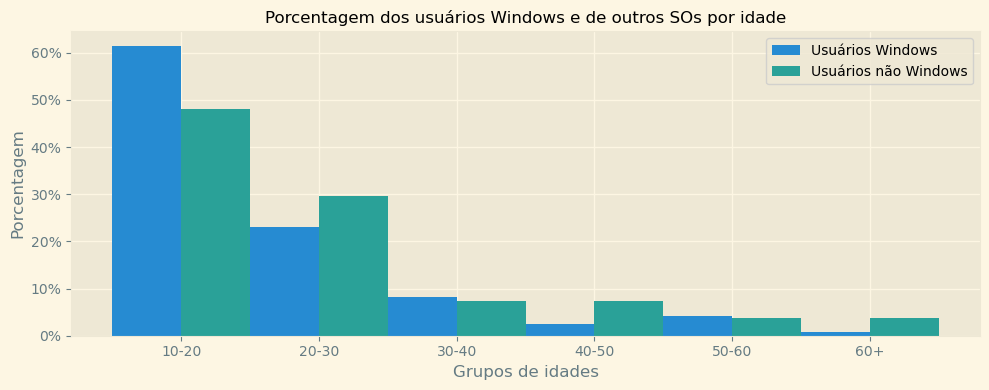

In [246]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('Solarize_Light2')

bins = [10, 20, 30, 40, 50, 60, 70]
bin_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60+']

windows_counts, _ = np.histogram(idade_windows, bins=bins)
nonwindows_counts, _ = np.histogram(idade_naoWindows, bins=bins)

#nessa parte criando um dataframe para poder puxar os valores da quantidade de usuários por
# intervalo para poder usá-los em operações para descobrir a porcentagem do total
df = pd.DataFrame({'Windows': windows_counts, 'Não Windows': nonwindows_counts})

# loop que acessa o index do dataframe criado anteriormente na ordem
# dos grupos e insere a porcentagem calculada de cada um deles
for i, j in enumerate(bin_labels):
    df.loc[i, 'Windows_pct'] = (windows_counts[i]/idade_windows.count())*100
    df.loc[i, 'Não Windows_pct'] = (nonwindows_counts[i]/idade_naoWindows.count())*100

fig, ax = plt.subplots(figsize=(10,4))

#mesma coisa do outro gráfico, porém dessa vez colocando como o y a coluna do dataframe diretamente
ax.bar(bin_labels, df['Windows_pct'], width=-.5, align='edge', label='Usuários Windows')
ax.bar(bin_labels, df['Não Windows_pct'], width=0.5, align='edge', label='Usuários não Windows')

#escolhendo os 'ticks' de y para poder no ax.set_yticklabels colocar como porcentagem
ax.set_yticks([0, 10, 20, 30, 40, 50, 60])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%'])

ax.set_xlabel('Grupos de idades')
ax.set_ylabel('Porcentagem') 

ax.set_title('Porcentagem dos usuários Windows e de outros SOs por idade', fontsize=12)

ax.legend()

plt.tight_layout()

plt.show()


In [247]:
#selecioanndo apenas a coluna do sistema operacional do celular das respostas
# de quem tem Windows como SO do computador e resetando o index
so_celulares = dados[dados['SO computador']=='Windows']['SO celular'].reset_index(drop=True)

#selecionando os valores únicos disponíveis na coluna
sos_disp = so_celulares.unique()

#fazendo um contador que passa por todos os valores unicos, faz uma operação lógica para 
# retornar apenas as linhas do valor único e usa o método count para obter a contagem
counter_sos = {}
for sos in sos_disp:
    counter_sos[sos] = so_celulares[so_celulares==sos].count()
counter_sos

{'Android': 99, 'iOS': 23}

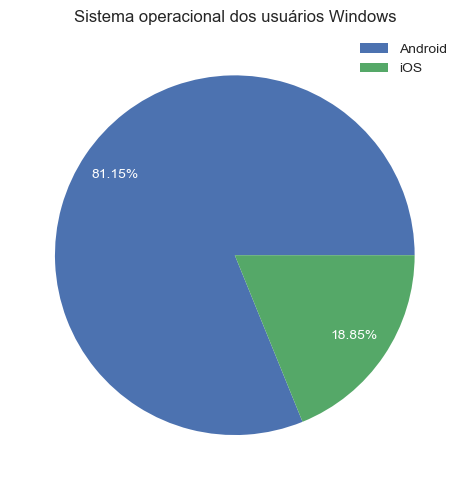

In [101]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(16, 5))

# Criando o gráfico de pizza, passando como parâmetro os valores disponíveis no dicinário Python,
# junto com a formatação do percentual que aparece dentro do gráfico e da distância delas do centro,
# além de mudar a cor dessas porcentagens para branco
ax.pie(counter_sos.values(), autopct='%1.2f%%', pctdistance=.8, textprops={'color': 'white'})

#colocando titulo e legenda
ax.set_title('Sistema operacional do celular dos usuários Windows')
ax.legend(counter_sos.keys())

#metodo que posiciona as coisas do melhor jeito na figura
plt.tight_layout()

#mostrar o gráfico
plt.show()

In [213]:
escolaridade = dados[dados['SO computador']=='Windows']['escolaridade'].reset_index(drop=True)

esc_disp = escolaridade.unique()

counter_esc = {}
for esc in esc_disp:
    counter_esc[esc] = escolaridade[escolaridade==esc].count()
    
counter_esc

{'Ensino Superior Incompleto': 36,
 'Ensino Médio Completo': 46,
 'Ensino Médio Incompleto': 9,
 'Ensino Superior Completo': 19,
 'Cursando ensino médio.': 1,
 'Ensino Fundamental Completo': 6,
 'Doutorado': 2,
 'Cursando Ensino Superior ': 1,
 'Mestrado': 1,
 'Cursando ensino superior ': 1}

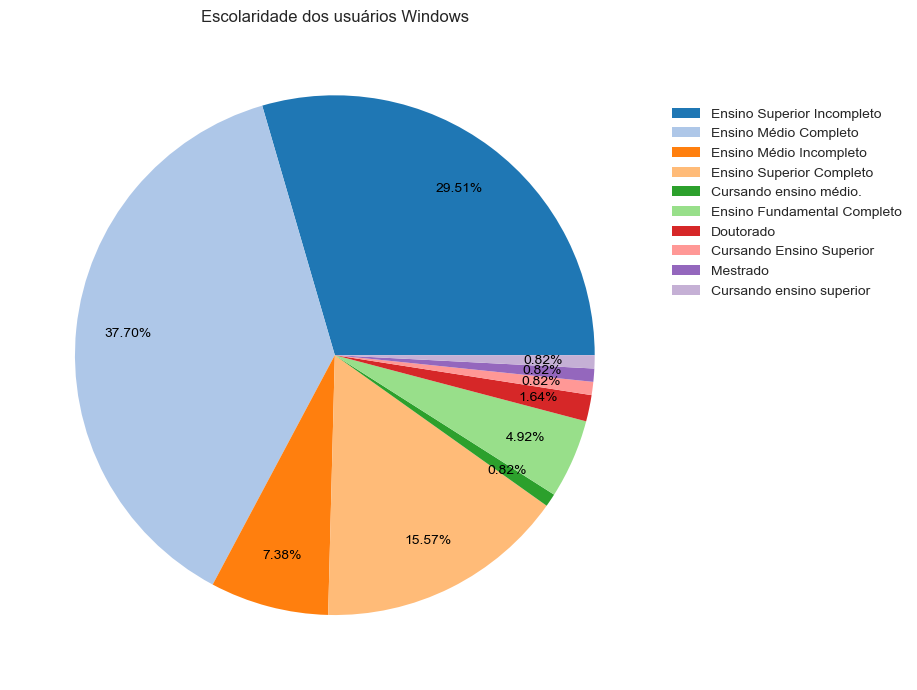

In [192]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(15, 7))

#Importação de um mapa de cores, para selecionar as cores de forma automática
cmap = plt.cm.get_cmap('tab20')

#uso de uma lista e um loop for para verificar o tamanho do dicionário e adicionar o número de cores correspondente
colors=[]
for i in range(len(counter_esc)):
    colors.append(cmap(i))

# criação do gráfico de pizza, com a formatação da porcentagem, a escolha das cores 
# que vem da lista criada
ax.pie(counter_esc.values(), 
       autopct='%1.2f%%', 
       pctdistance=.8, 
       textprops={'color': 'k'}, 
       colors=colors)

#colocando titulo e legenda
ax.set_title('Escolaridade dos usuários Windows')
ax.legend(counter_esc.keys(), bbox_to_anchor=(1, .9))

#metodo que posiciona as coisas do melhor jeito na figura
plt.tight_layout()

#mostrar o gráfico
plt.show()

In [258]:
sistema = dados['SO computador']

sistemas = sistema.unique()

counter_sys = {}
for sist in sistemas:
    counter_sys[sist] = sistema[sistema==sist].count()
    
counter_sys = pd.Series(counter_sys)
counter_sys

Windows                 122
NaN                       0
OS X (MacOS)              5
Linux                     2
Não saberia informar      7
Android                   2
dtype: int64

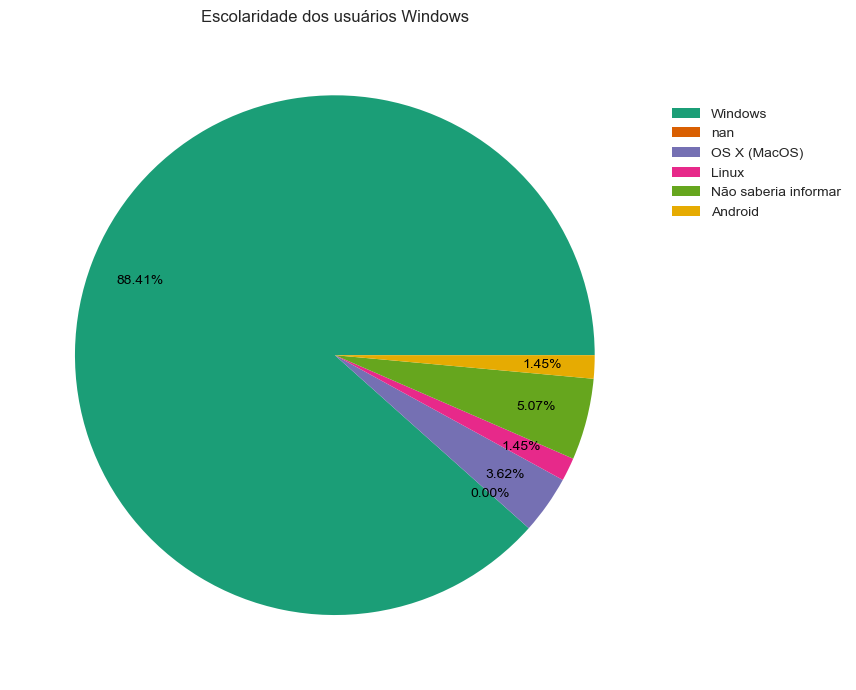

In [244]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(15, 7))

#Importação de um mapa de cores, para selecionar as cores de forma automática
cmap = plt.cm.get_cmap('Dark2')

#uso de uma lista e um loop for para verificar o tamanho do dicionário e adicionar o número de cores correspondente
colors=[]
for i in range(len(counter_sys)):
    colors.append(cmap(i))

# criação do gráfico de pizza, com a formatação da porcentagem, a escolha das cores 
# que vem da lista criada
ax.pie(counter_sys, 
       autopct='%1.2f%%', 
       pctdistance=.8, 
       textprops={'color': 'k'}, 
       colors=colors)

#colocando titulo e legenda
ax.set_title('Escolaridade dos usuários Windows')
ax.legend(counter_sys.index, bbox_to_anchor=(1, .9))

#metodo que posiciona as coisas do melhor jeito na figura
plt.tight_layout()

#mostrar o gráfico
plt.show()